In [10]:
%pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.impute import KNNImputer

In [14]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



In [36]:
df = pd.read_csv(r"C:/Users/Manisha/OneDrive/Desktop/Projects/youtube_ad_revenue_dataset.csv")
display(df.sample(10))

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
43289,vid_4119,2024-08-01 10:50:40.993199,10149,969.0,282.0,27841.186670,8.547216,870974,Education,Desktop,CA,205.639924
9878,vid_4523,2024-09-09 10:50:40.993199,10121,1591.0,275.0,33564.231254,3.220769,813481,Gaming,TV,UK,243.045753
95726,vid_4519,2025-01-15 10:50:40.993199,10258,1107.0,372.0,37499.111832,26.370415,528667,Lifestyle,Desktop,UK,255.659206
56681,vid_469,2024-07-30 10:50:40.993199,10019,1628.0,274.0,44566.799503,10.391439,686752,Tech,TV,AU,295.005038
59747,vid_3828,2025-02-27 10:50:40.993199,9902,1645.0,327.0,15934.363608,25.613573,167600,Lifestyle,Desktop,AU,160.609896
88760,vid_3364,2025-02-09 10:50:40.993199,10052,1555.0,442.0,NaN,3.663213,172270,Gaming,Desktop,DE,203.077779
119247,vid_3217,2025-03-03 10:50:40.993199,9994,1997.0,236.0,35335.525998,6.653701,746867,Music,TV,UK,257.042624
94410,vid_4228,2024-07-15 10:50:40.993199,9991,1201.0,233.0,19236.652580,23.099999,66946,Tech,Desktop,UK,167.395585
48306,vid_4212,2024-09-04 10:50:40.993199,9985,1632.0,53.0,20856.383553,27.634231,925859,Music,Desktop,UK,179.314627
10936,vid_2901,2024-07-15 10:50:40.993199,9919,1245.0,115.0,41165.984010,7.909155,247880,Education,Tablet,CA,269.135188


In [4]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [5]:
#Missing values
df.isna().sum()



video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [8]:
df.isna().sum() 

video_id                   0
date                       0
views                      0
likes                      0
comments                   0
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [37]:
df.drop_duplicates( inplace=True)
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [32]:
from sklearn.preprocessing import StandardScaler

In [38]:
df.isna().sum()
df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean(), inplace=True)
df['likes'].fillna(df['likes'].mean(), inplace=True)
df['comments'].fillna(df['comments'].mean(), inplace=True)  

C:\Users\Manisha\AppData\Local\Temp\ipykernel_2796\3173911260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean(), inplace=True)
C:\Users\Manisha\AppData\Local\Temp\ipykernel_2796\3173911260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [39]:
from sklearn.model_selection import train_test_split
# Feature engineering
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']
df['subscriber_value'] = df['ad_revenue_usd'] / (df['subscribers'] )


# Separate features and target
X = df.drop(columns=['date', 'ad_revenue_usd','video_id'],errors='ignore')
y = df['ad_revenue_usd']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [40]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    'ElasticNet':ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# Identify categorical & numeric columns
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

In [41]:
# Categorical preprocessing pipeline



categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'),cat_cols)
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [42]:
# Store results
results = []

# Identify numeric and categorical columns
num_features = ["views", "likes", "comments", "watch_time_minutes", 
                "video_length_minutes", "subscribers", "engagement_rate", 
                "subscriber_value"]
cat_features = ["category", "device", "country"]

# Create preprocessor with proper handling of both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Loop through models
for name, model in models.items():
    # Create pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit and predict
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

C:\Users\Manisha\AppData\Local\Temp\ipykernel_2796\4232563429.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Manisha\AppData\Local\Temp\ipykernel_2796\4232563429.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Manisha\AppData\Local\Temp\ipykernel_2796\4232563429.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




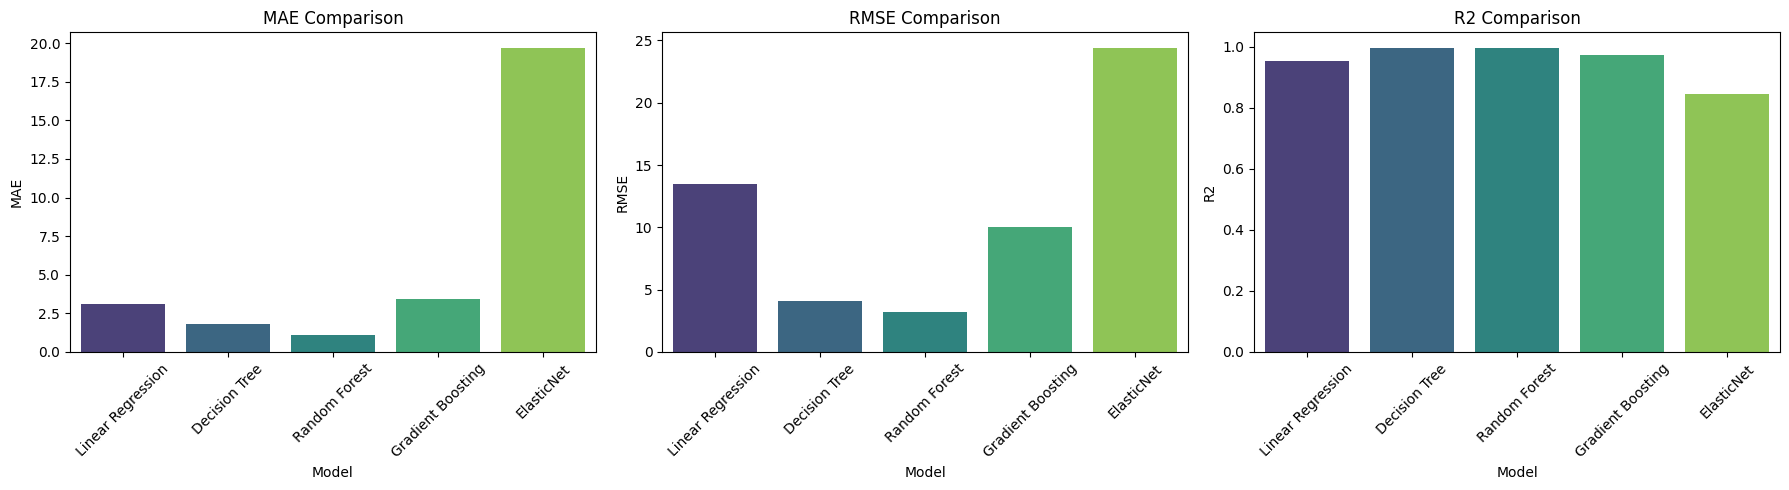

In [47]:
metrics = ['MAE', 'RMSE', 'R2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [48]:

fig = px.bar(results_df.melt(id_vars='Model'), 
             x='Model', y='value', color='variable', 
             barmode='group', title='Model Comparison Across Metrics')
fig.show()

In [43]:
# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print(results_df)

# Columns
num_features = ["views", "likes", "comments", "watch_time_minutes",
                "video_length_minutes", "subscribers",
                "engagement_rate", "subscriber_value"]

cat_features = ["category", "device", "country"]

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])
# Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "Linear Regression.pkl")
print("✅ Final pipeline saved as Linear Regression.pkl")




               Model        MAE       RMSE        R2
0  Linear Regression   3.120246  13.479562  0.952577
1      Decision Tree   1.830672   4.109420  0.995592
2      Random Forest   1.099995   3.238005  0.997264
3  Gradient Boosting   3.399943  10.035332  0.973716
4         ElasticNet  19.713562  24.427277  0.844266
✅ Final pipeline saved as Linear Regression.pkl
